In [1]:
import math
from math import log
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import extractor as ext
import pandas as pd

# Nonlinear measures for dynamic system
# import nodls

In [2]:
fbase = pd.read_csv('./1_filtered.csv', header=None)

In [3]:
extractor = ext.RecordExtractor()
cycles = extractor.read_sample(fbase)
len(cycles)

4

In [5]:
cycle_01 = cycles[0][0]
print(cycle_01)
print(len(cycle_01.grip))
cycle_01.grip.info()

12000
<class 'pandas.core.series.Series'>
RangeIndex: 12000 entries, 108000 to 119999
Series name: 0
Non-Null Count  Dtype  
--------------  -----  
12000 non-null  float64
dtypes: float64(1)
memory usage: 93.9 KB


Implement feature extractors:

1. SampEn - Sample Entropy
2. RMS - Root Mean Square
3. WL - Waveform Length
4. WAMP - Willison Amplitude
5. ApEn - Approximate entropy
6. MAV - Mean Absolute Value

# SampEn

Sample entropy (SampEn) is a modification of approximate entropy (ApEn), used for assessing the complexity of physiological time-series signals, diagnosing diseased states. SampEn has two advantages over ApEn: data length independence and a relatively trouble-free implementation.

In [6]:
import nolds

nolds.sampen(cycle_01.grip[:int(.2*extractor._freq)])

0.7602211260562872

[0.7602211260562872, 0.8383235562365957, 0.832280568285916, 0.8203387085788482, 0.765925255117885, 0.7443794984636031, 0.7655972614424486, 0.7837644956613372, 0.7995595370360109, 0.8087560163167737, 0.8183578192166786, 0.823476426081142, 0.8239126497512368, 0.8197006719027885, 0.8166372463527615, 0.8112084641089656, 0.8066422994926782, 0.7986008110350881, 0.8031022277300174, 0.8045878066050564, 0.8045878066050564]


<BarContainer object of 21 artists>

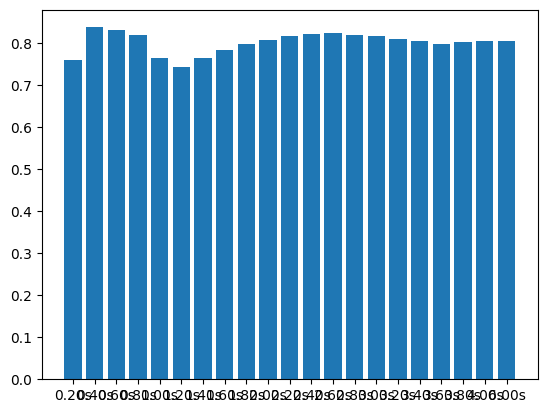

In [7]:
data = []
names = []
for i in range(20):
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(nolds.sampen((cycle_01.grip[:int(window)])))
    names.append("{0:0.2f}s".format(window_s))

data.append(nolds.sampen(cycle_01.grip[:int(window)]))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)


plt.bar(names, data)

# RMS - Root Mean Square 
Is the sum of all squared values, divided by the amount and made a square root
Also named as Effective Value

In [11]:
def rms(sample):
    return np.sqrt(np.mean(sample**2))

In [12]:
rms(cycle_01.grip)

0.023864513859219446

In [13]:
# Choose the range, or the window
rms(cycle_01.grip[:int(.2*extractor._freq)])

0.02493058423110956

[0.02493058423110956, 0.025201874107211978, 0.027130253427377897, 0.025025661738195662, 0.029781746217193476, 0.029781746217193476]


<BarContainer object of 6 artists>

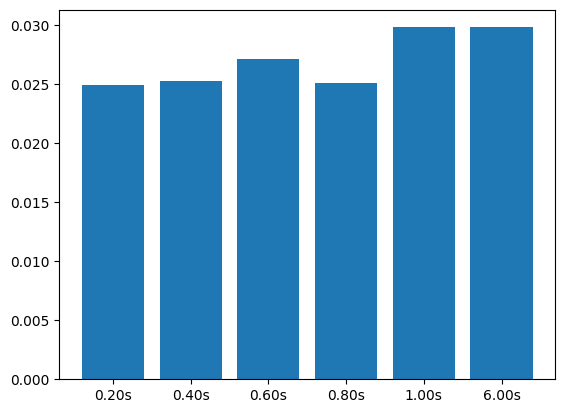

In [14]:
data = []
names = []
for i in range(5):
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(rms(cycle_01.grip[:int(window)]))
    names.append("{0:0.2f}s".format(window_s))

data.append(rms(cycle_01.grip[:int(window)]))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)


plt.bar(names, data)

Waveform Length
Waveform length is a measure of complexity of the EMG signal. It is defined as cumulative length of the EMG waveform over the time segment.

![Wave Formula](./wavelength_formula.png)

In [15]:
def waveformlen(sample):
    sum = 0
    for i in range(len(sample)-1):
        sum += math.fabs(sample[i+1] - sample[i])
    return sum

In [16]:
waveformlen(np.array(cycle_01.grip[:int(.2*extractor._freq)]))

3.0441391619407665

[3.0441391619407665, 6.253401098561423, 10.018518552072353, 11.9663951364319, 17.022296042432373, 21.882046602603143, 26.714259144825537, 30.490074825988945, 33.96374595101503, 37.17771374273675, 40.54075922674254, 43.63451366741027, 46.15943545772991, 48.52122317268738, 50.7029129187065, 52.753030401297174, 54.79432161750294, 56.558564122541384, 58.963460796773, 61.40803323858797, 61.40803323858797]


<BarContainer object of 21 artists>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

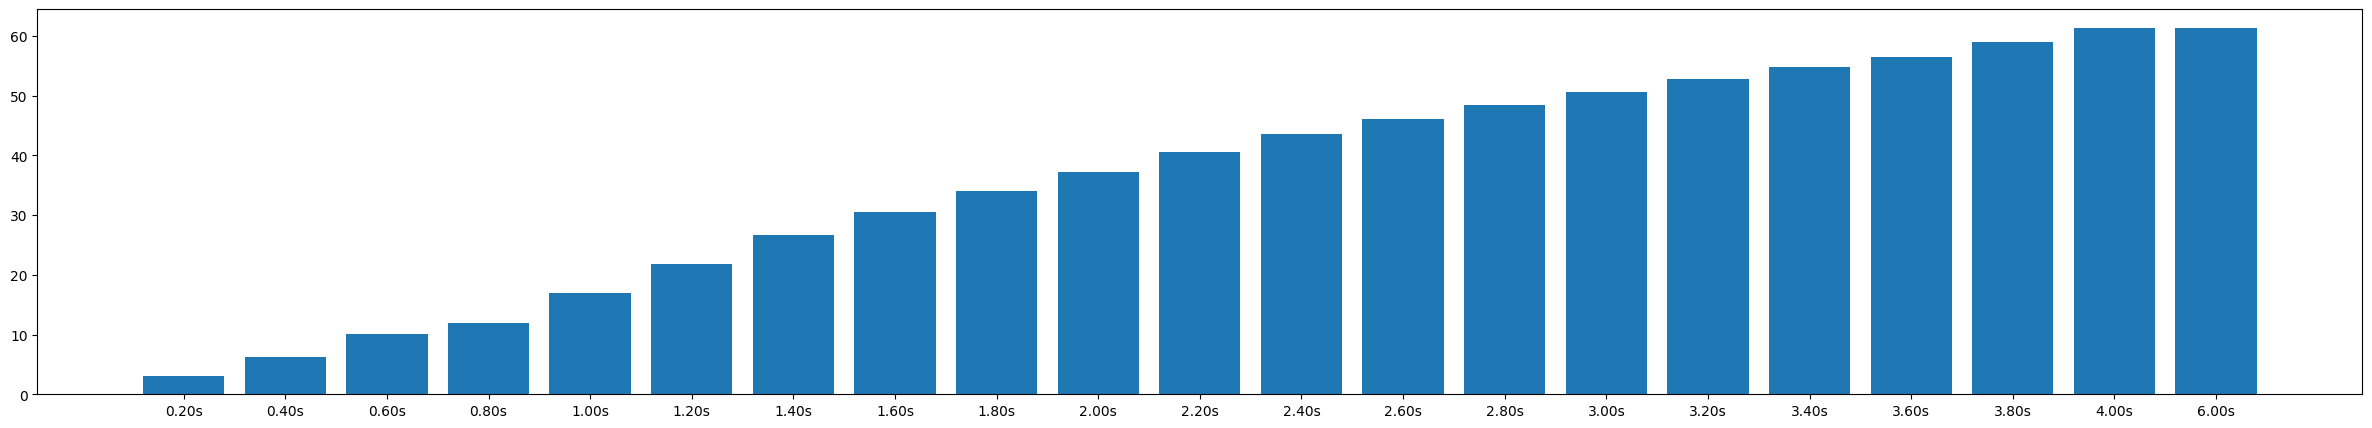

In [21]:
data = []
names = []
for i in range(20):
    plt.figure(figsize=(30,5))
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(waveformlen(np.array(cycle_01.grip[:int(window)])))
    names.append("{0:0.2f}s".format(window_s))

data.append(waveformlen(np.array(cycle_01.grip[:int(window)])))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)

plt.bar(names, data)

# Willison Amplitude
Willison  amplitude  (WAMP)  is  the  number  of counts  for  each  change  in  the  EMG  signal amplitude  that  exceeds  a  predefine threshold

![wamp](./wamp.png)

In [22]:
def wamp(sample, threshold=10):
    """
    @param: sample - Sample based on volts
    @param: threshold - Based on milivolts
    """
    threshold /= 1000
    sum = 0
    for i in range(len(sample)-1):
        v = math.fabs(sample[i] - sample[i+1])
        if v > threshold:
            sum += 1
    return sum

In [24]:
wamp(np.array(cycle_01.grip[:int(.2*extractor._freq)]))

104

[104, 223, 374, 422, 599, 599]


<BarContainer object of 6 artists>

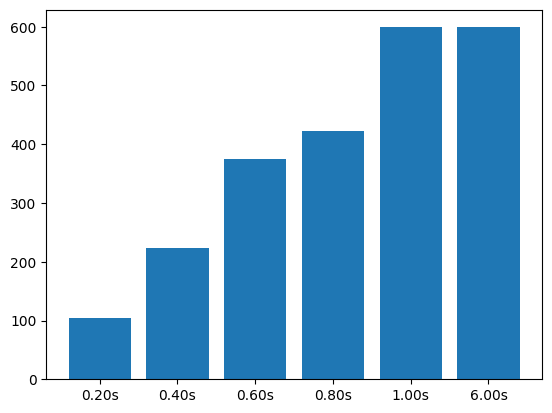

In [25]:
data = []
names = []
for i in range(5):
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(wamp(np.array(cycle_01.grip[:int(window)])))
    names.append("{0:0.2f}s".format(window_s))

data.append(wamp(np.array(cycle_01.grip[:int(window)])))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)

plt.bar(names, data)

# Approximate Entropy
ApEn, technique used to quantify the amount of regularity and the unpredictability of fluctuations over time-series data.

The approximate entropy explains the complexity of the irregularity, quantifies how predictible the values of a time series are.

In [26]:
import antropy as an

an.app_entropy(cycle_01.grip[:int(.2*extractor._freq)]) # Slow

0.7642442256935573

In [ ]:
data = []
names = []
for i in range(20):
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(an.app_entropy(np.array(cycle_01.grip[:int(window)])))
    names.append("{0:0.2f}s".format(window_s))

data.append(an.app_entropy(np.array(cycle_01.grip[:int(window)])))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)

plt.bar(names, data)

MAV - Mean Absolute Value
Measures the contraction level of muscles.
 
Does't looks promising

![MAV](./mav.png)

In [27]:
def mav(sample):
    sum = 0
    for i in sample:
        sum += math.fabs(i)

    return sum/len(sample)

In [28]:
mav(cycle_01.grip[:int(.2*extractor._freq)])

0.0193336218443021

[0.0193336218443021, 0.019908382214426888, 0.021583177815388807, 0.01970969862418291, 0.02190467575573288, 0.02452071271702724, 0.02493895307651005, 0.024494883972701463, 0.023933302174014588, 0.023541198490560925, 0.023222510693423837, 0.02272383780006713, 0.022089385399664308, 0.021500922133729266, 0.020846481702983612, 0.02027986174755104, 0.019877851621550632, 0.019345571503111298, 0.019059013185339983, 0.018858429037819244, 0.018858429037819244]


<BarContainer object of 21 artists>

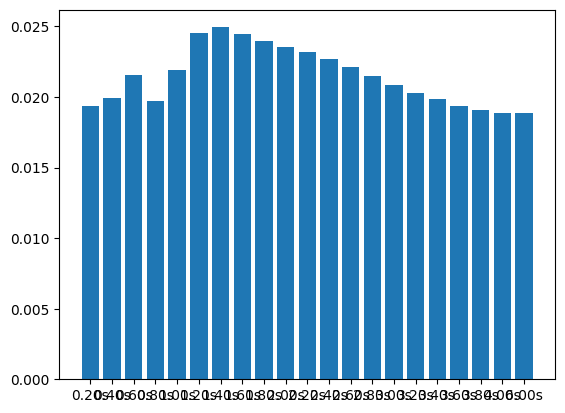

In [29]:
data = []
names = []
for i in range(20):
    window_s = .2 * (i+1)
    window = window_s * extractor._freq
    data.append(mav(np.array(cycle_01.grip[:int(window)])))
    names.append("{0:0.2f}s".format(window_s))

data.append(mav(np.array(cycle_01.grip[:int(window)])))
names.append('{0:0.2f}s'.format(cycle_01.grip.__len__()/extractor._freq))
print(data)

plt.bar(names, data)